In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv('weather.csv')
seq = data.iloc[:,:].values
print(seq)

[[ 8.  24.3  0.   3.4  6.3]
 [14.  26.9  3.6  4.4  9.7]
 [13.7 23.4  3.6  5.8  3.3]
 ...
 [12.5 19.9  0.   8.4  5.3]
 [12.5 26.9  0.   5.   7.1]
 [12.3 30.2  0.   6.  12.6]]


In [10]:
look_back = 3
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back)]
		dataX.append(a)
		dataY.append(dataset[i + look_back])
	return np.array(dataX), np.array(dataY)
 
scaler = MinMaxScaler(feature_range=(-1, 1))
seq_scaled = scaler.fit_transform(seq)

seq_train = seq_scaled[:300,:]
seq_test = seq_scaled[300:,:]
X_train,Y_train= create_dataset(seq_train,look_back)
X_test,Y_test= create_dataset(seq_test,look_back)

print(seq_train[:5])
print("-----------------------")
print(X_train[:5])
print("-----------------------")
print(Y_train[:5])

[[ 0.01526718  0.18439716 -1.         -0.52941176 -0.07352941]
 [ 0.47328244  0.36879433 -0.81909548 -0.38235294  0.42647059]
 [ 0.45038168  0.12056738 -0.81909548 -0.17647059 -0.51470588]
 [ 0.41984733 -0.43971631  1.          0.02941176  0.33823529]
 [-0.01526718 -0.39716312 -0.85929648 -0.20588235  0.55882353]]
-----------------------
[[[ 0.01526718  0.18439716 -1.         -0.52941176 -0.07352941]
  [ 0.47328244  0.36879433 -0.81909548 -0.38235294  0.42647059]
  [ 0.45038168  0.12056738 -0.81909548 -0.17647059 -0.51470588]]

 [[ 0.47328244  0.36879433 -0.81909548 -0.38235294  0.42647059]
  [ 0.45038168  0.12056738 -0.81909548 -0.17647059 -0.51470588]
  [ 0.41984733 -0.43971631  1.          0.02941176  0.33823529]]

 [[ 0.45038168  0.12056738 -0.81909548 -0.17647059 -0.51470588]
  [ 0.41984733 -0.43971631  1.          0.02941176  0.33823529]
  [-0.01526718 -0.39716312 -0.85929648 -0.20588235  0.55882353]]

 [[ 0.41984733 -0.43971631  1.          0.02941176  0.33823529]
  [-0.01526718

In [13]:
model = Sequential()
model.add(layers.SimpleRNN(50, input_shape=(look_back,5)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(5))
model.compile(loss='mean_squared_error', optimizer="RMSProp")
model.fit(X_train, Y_train, epochs=100, batch_size=64, verbose=1)



Epoch 1/100

5/5 [==============================] - 1s 5ms/step - loss: 0.5398
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.2221
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1582
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1434
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1311
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1261
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1234
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1243
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1150
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1151
Epoch 11/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1169
Epoch 12/100
5/5 [==============================] - 0s 6ms/step - loss: 0.1109
Epoch 13/100
5/5 [==============================] - 0s 4ms

5/5 [==============================] - 0s 4ms/step - loss: 0.0801
Epoch 98/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0805
Epoch 99/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0776
Epoch 100/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0783


10/10 [==============================] - 0s 2ms/step
[[12.498461   22.91944     4.7246146   4.664322    7.3689675 ]
 [ 6.5580735  19.04499     3.600161    4.451118   12.186026  ]
 [ 7.453885   19.277456    1.8631294   6.3314333   9.289968  ]
 ...
 [-0.20764574 12.871522   -0.1365523   1.753171    7.0505223 ]
 [-0.07062806 14.117844   -1.6719865   2.9911523   8.454203  ]
 [-1.1438234  15.127529   -1.2376106   3.0187054   8.403589  ]]


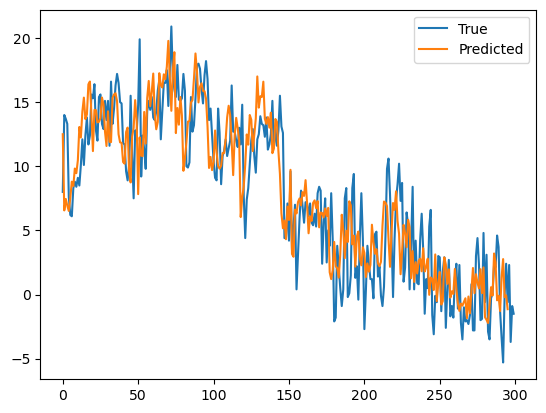

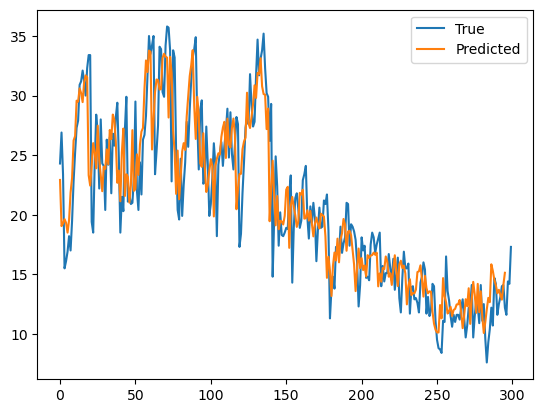

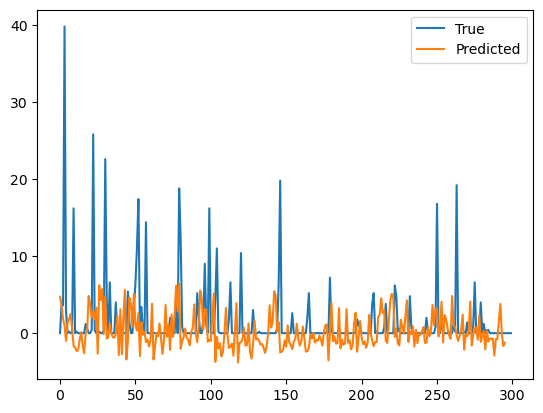

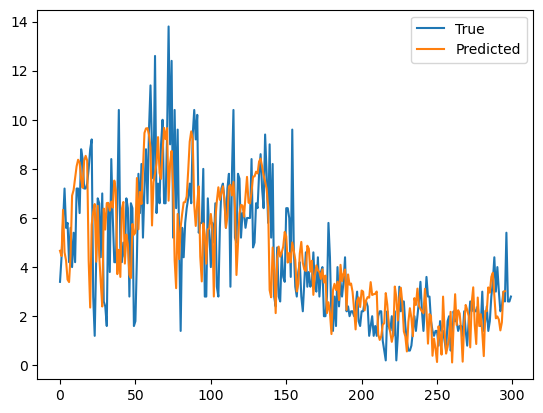

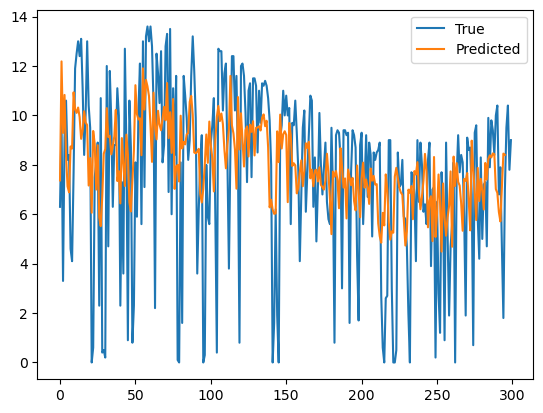

In [14]:
seq_train_pred_scaled = model.predict(X_train)
seq_train_pred = scaler.inverse_transform(seq_train_pred_scaled)
X_train_org = scaler.inverse_transform(seq_train)
print(seq_train_pred)
for i in range(5):
  plt.plot(X_train_org[:,i],label='True')
  plt.plot(seq_train_pred[:,i],label='Predicted')
  plt.legend()
  plt.show()

2/2 [==============================] - 0s 3ms/step


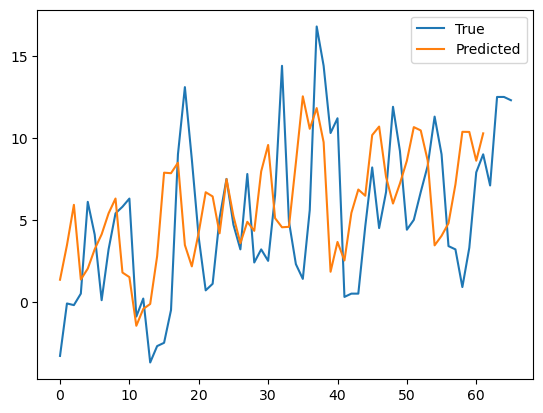

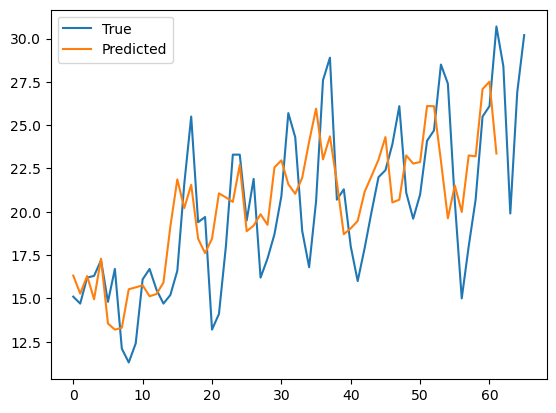

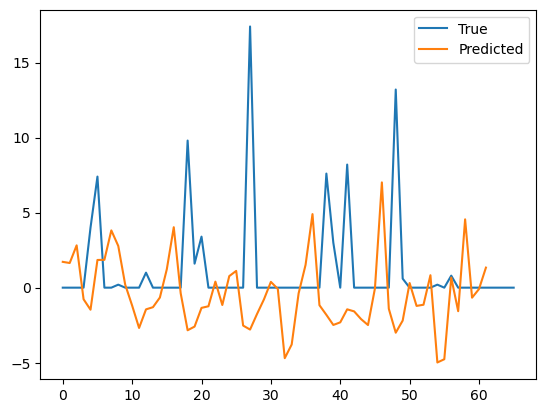

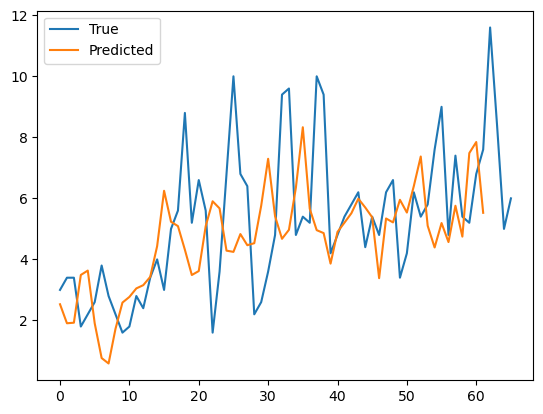

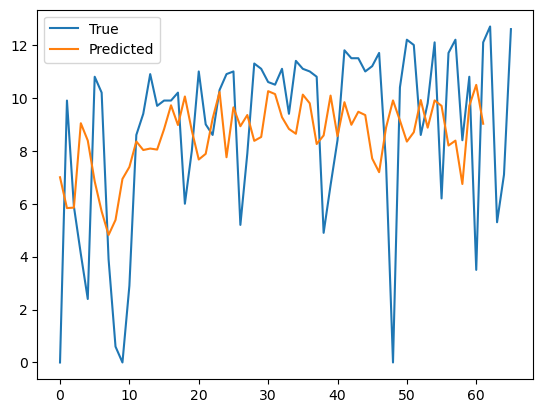

In [15]:
seq_test_pred_scaled = model.predict(X_test)
seq_test_pred = scaler.inverse_transform(seq_test_pred_scaled)
X_test_org = scaler.inverse_transform(seq_test)
for i in range(5):
    plt.plot(X_test_org[:,i],label='True')
    plt.plot(seq_test_pred[:,i],label='Predicted')
    plt.legend()
    plt.show()